## Yards after First Contact EDA- NFL Big Data Bowl 2024

What scenario leads to a missed tackle after a reception

In [1]:
#Read in data/ install packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
#Lets first get all of our data into pandas dataframes


games = pd.read_csv('data/games.csv')
players = pd.read_csv('data/players.csv')
plays = pd.read_csv('data/plays.csv')
tackles = pd.read_csv('data/tackles.csv')
tracking_week_1 = pd.read_csv('data/tracking_week_1.csv')
tracking_week_2 = pd.read_csv('data/tracking_week_2.csv')
tracking_week_3 = pd.read_csv('data/tracking_week_3.csv')
tracking_week_4 = pd.read_csv('data/tracking_week_4.csv')
tracking_week_5 = pd.read_csv('data/tracking_week_5.csv')
tracking_week_6 = pd.read_csv('data/tracking_week_6.csv')
tracking_week_7 = pd.read_csv('data/tracking_week_7.csv')
tracking_week_8 = pd.read_csv('data/tracking_week_8.csv')
tracking_week_9 = pd.read_csv('data/tracking_week_9.csv')



The following descriptions of each dataset were copied directly from [NFL BDB 2024's Kaggle](<https://www.kaggle.com/competitions/nfl-big-data-bowl-2024/data>), with a few additions where needed.


### Game Data

- **gameId**: Game identifier, unique (numeric)
- **season**: Season of the game
- **week**: Week of the game
- **gameDate**: Game Date (time, mm/dd/yyyy)
- **gameTimeEastern**: Start time of the game (time, HH:MM:SS, EST)
- **homeTeamAbbr**: Home team three-letter code (text)
- **visitorTeamAbbr**: Visiting team three-letter code (text)
- **homeFinalScore**: The total amount of points scored by the home team in the game (numeric)
- **visitorFinalScore**: The total amount of points scored by the visiting team in the game (numeric)

This dataset contains information about various football games, including game identifiers, season, week, game date, game time, and scores for both the home and visiting teams. It provides essential details for analyzing and understanding the games.


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
games.head(5)

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,09/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,09/11/2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,09/11/2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,09/11/2022,13:00:00,CIN,PIT,20,23


### Play Data

- **gameId**: Game identifier, unique (numeric)
- **playId**: Play identifier, not unique across games (numeric)
- **ballCarrierId**: The nflId of the ball carrier (receiver of the handoff, receiver of pass, or the QB scrambling) on the play. This is the player that the defense is attempting to tackle (numeric)
- **ballCarrierName**: The displayName of the ball carrier on the play (text)
- **playDescription**: Description of the play (text)
- **quarter**: Game quarter (numeric)
- **down**: Down (numeric)
- **yardsToGo**: Distance needed for a first down (numeric)
- **possessionTeam**: Team abbreviation of the team on offense with possession of the ball (text)
- **defensiveTeam**: Team abbreviation of the team on defense (text)
- **yardlineSide**: 3-letter team code corresponding to the line-of-scrimmage (text)
- **yardlineNumber**: Yard line at the line-of-scrimmage (numeric)
- **gameClock**: Time on the clock of the play (MM:SS)
- **preSnapHomeScore**: Home score prior to the play (numeric)
- **preSnapVisitorScore**: Visiting team score prior to the play (numeric)
- **passResult**: Dropback outcome of the play (C: Complete pass, I: Incomplete pass, S: Quarterback sack, IN: Intercepted pass, R: Scramble, text)
- **passLength**: The distance beyond the line of scrimmage that the ball traveled, not including yards into the endzone. If thrown behind the line of scrimmage, the value is negative (numeric)
- **penaltyYards**: Yards gained by the offense due to penalty (numeric)
- **prePenaltyPlayResult**: Net yards gained by the offense before penalty yardage (numeric)
- **playResult**: Net yards gained by the offense, including penalty yardage (numeric)
- **playNullifiedByPenalty**: Whether or not an accepted penalty on the play cancels the play outcome. "Y" stands for yes, and "N" stands for no (text)
- **absoluteYardlineNumber**: Distance from the end zone for the possession team (numeric)
- **offenseFormation**: Formation used by the possession team (text)
- **defendersInTheBox**: Number of defenders in close proximity to the line-of-scrimmage (numeric)
- **passProbability**: NGS probability of the next play being a pass (as opposed to a rush) based on a model without tracking data inputs (numeric)
- **preSnapHomeTeamWinProbability**: The win probability of the home team before the play (numeric)
- **preSnapVisitorTeamWinProbability**: The win probability of the visiting team before the play (numeric)
- **homeTeamWinProbabilityAdded**: Win probability delta for the home team (numeric)
- **visitorTeamWinProbabilityAdded**: Win probability delta for the visiting team (numeric)
- **expectedPoints**: Expected points on this play (numeric)
- **expectedPointsAdded**: Delta of expected points on this play (numeric)
- **foulName[i]**: Name of the i-th penalty committed during the play. "i" ranges between 1 and 2 (text)
- **foulNFLId[i]**: NFL ID of the player who committed the i-th penalty during the play. "i" ranges between 1 and 2 (numeric)

This dataset provides detailed information about individual plays in football games, including information about players, play outcomes, penalties, and various play-related metrics.


In [5]:
plays.head(5)

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,ATL,41,7:52,21,7,C,6.0,NaN,9,9,N,69,SHOTGUN,7.0,0.747284,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,PIT,34,7:38,14,20,NaN,NaN,NaN,3,3,N,76,SHOTGUN,7.0,0.416454,0.160485,0.839515,-0.010865,0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,LV,30,8:57,10,3,C,11.0,NaN,15,15,N,40,I_FORM,6.0,0.267933,0.756661,0.243339,-0.037409,0.037409,1.312855,1.133666,NaN,NaN,NaN,NaN
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,DEN,37,13:12,19,16,NaN,NaN,NaN,7,7,N,47,SINGLEBACK,6.0,0.592704,0.620552,0.379448,-0.002451,0.002451,1.641006,-0.043580,NaN,NaN,NaN,NaN
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,TEN,35,8:33,7,7,NaN,NaN,NaN,3,3,N,75,I_FORM,7.0,0.470508,0.836290,0.163710,0.001053,-0.001053,3.686428,-0.167903,NaN,NaN,NaN,NaN


### Player Data

- **nflId**: Player identification number, unique across players (numeric)
- **height**: Player height (text)
- **weight**: Player weight (numeric)
- **birthDate**: Date of birth (YYYY-MM-DD)
- **collegeName**: Player college (text)
- **position**: Official player position (text)
- **displayName**: Player name (text)

This dataset contains player-specific information, including unique player identifiers, physical attributes, date of birth, college affiliation, official player positions, and player names.


In [6]:
players.head(5)

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan


### Tackles Data

- **gameId**: Game identifier, unique (numeric)
- **playId**: Play identifier, not unique across games (numeric)
- **nflId**: Player identification number, unique across players (numeinary)
- **forcedFumble**: Indicator for whether the given player forced a fumble on the play ( tackles.

- **tackle**: 
  - 1: A single player made a tackle on the ballcarrier.
  - 0: A tackle was not made or the tackle was made by 2 or more players and will be listed as an assist.

- **assist**: 
  - 1: This is one of two players who were directly involved in the tackling of the ballcarrier.
  - 0: This player either was not involved in the tackle or made the tackle by himself.

- **pff_missedTackle**: 
  - Provided by Pro Football Focus (PFF), this column is a binary indicator for whether the given player missed a tackle on the play.
  - 1: The player missed the tackle on the play.
  - 0: The player did not miss the tackle or successfully made ame play. 


In [7]:
tackles.head(5)

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle
0,2022090800,101,42816,1,0,0,0
1,2022090800,393,46232,1,0,0,0
2,2022090800,486,40166,1,0,0,0
3,2022090800,646,47939,1,0,0,0
4,2022090800,818,40107,1,0,0,0


Please note that in some cases, a player can **initially miss a tackle** and then successfully **make one later in the same play**. Therefore, you may encounter situations where there is a 1 in both the "missed tackle" and "assist" or "tackle" columns. This reflects the player's involvement in both a missed tackle and a successful tackle on the same play.

As shown below a 1 appearing in the pff_missed_Tackle column does not necessarily mean a 1 cannot exist in the tackle or assist column

In [8]:
tackles[(tackles.pff_missedTackle == 1) & ((tackles.assist ==1) | (tackles.tackle == 1))]

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle
219,2022091805,2361,52444,1,0,0,1
455,2022091102,189,52571,1,0,0,1
696,2022091105,2742,53450,1,0,0,1
935,2022091110,750,52546,1,0,0,1
1213,2022091200,3723,52435,1,0,0,1
...,...,...,...,...,...,...,...
14466,2022103009,2812,46304,0,1,0,1
14882,2022102400,348,52445,0,1,0,1
15038,2022110610,2629,46846,0,1,0,1
15043,2022110700,588,44851,0,1,0,1


In [9]:
# Group the DataFrame by 'gameId' and 'playId' and count the number of unique NFL IDs for each unique play
play_counts = tackles.groupby(['gameId', 'playId'])['nflId'].nunique()

# Filter for plays with more than 2 unique NFL IDs
plays_with_more_than_two_players = play_counts[play_counts > 2]

# List of unique plays with more than 2 players
unique_plays_with_more_than_two_players = plays_with_more_than_two_players.index

# Print the unique plays with more than 2 players
print(unique_plays_with_more_than_two_players)


MultiIndex([(2022090800, 1385),
            (2022090800, 2163),
            (2022090800, 2712),
            (2022090800, 2839),
            (2022090800, 3576),
            (2022091100, 2069),
            (2022091100, 2491),
            (2022091100, 3926),
            (2022091101,  296),
            (2022091101,  382),
            ...
            (2022110610,  833),
            (2022110610, 1066),
            (2022110610, 1419),
            (2022110610, 2193),
            (2022110610, 2792),
            (2022110610, 3593),
            (2022110700,  646),
            (2022110700,  781),
            (2022110700, 1532),
            (2022110700, 2965)],
           names=['gameId', 'playId'], length=629)


In [10]:
play_counts.unique()

array([1, 2, 4, 3, 5, 7, 6], dtype=int64)

There can be anywhere from 1 to 5 different defensive players listed in our tackles column

In [11]:
#Drop columns we aren't interested in for these purposes
player_stats = players.drop('birthDate',axis=1).drop('collegeName',axis=1)
player_stats

#Find only the completed pass plays in 'plays' dataframe
pass_plays = plays[plays.passResult == 'C']
pass_plays

#Filter tracking data for completed pass plays
tracking_week_1_pass = tracking_week_1[
    tracking_week_1.set_index(['gameId', 'playId']).index.isin(pass_plays.set_index(['gameId', 'playId']).index)
]

tracking_week_2_pass = tracking_week_2[
    tracking_week_2.set_index(['gameId', 'playId']).index.isin(pass_plays.set_index(['gameId', 'playId']).index)
]

tracking_week_3_pass = tracking_week_3[
    tracking_week_3.set_index(['gameId', 'playId']).index.isin(pass_plays.set_index(['gameId', 'playId']).index)
]
tracking_week_4_pass = tracking_week_4[
    tracking_week_4.set_index(['gameId', 'playId']).index.isin(pass_plays.set_index(['gameId', 'playId']).index)
]
tracking_week_5_pass = tracking_week_5[
    tracking_week_5.set_index(['gameId', 'playId']).index.isin(pass_plays.set_index(['gameId', 'playId']).index)
]
tracking_week_6_pass = tracking_week_6[
    tracking_week_6.set_index(['gameId', 'playId']).index.isin(pass_plays.set_index(['gameId', 'playId']).index)
]
tracking_week_7_pass = tracking_week_7[
    tracking_week_7.set_index(['gameId', 'playId']).index.isin(pass_plays.set_index(['gameId', 'playId']).index)
]
tracking_week_8_pass = tracking_week_8[
    tracking_week_8.set_index(['gameId', 'playId']).index.isin(pass_plays.set_index(['gameId', 'playId']).index)
]
tracking_week_9_pass = tracking_week_9[
    tracking_week_9.set_index(['gameId', 'playId']).index.isin(pass_plays.set_index(['gameId', 'playId']).index)
]

#Filter tackles df the same way
tackles_pass = tackles[
    tackles.set_index(['gameId', 'playId']).index.isin(pass_plays.set_index(['gameId', 'playId']).index)
]

In [12]:
# Create a list of your tracking week DataFrames
tracking_weeks_pass = [tracking_week_1_pass, tracking_week_2_pass, tracking_week_3_pass, tracking_week_4_pass, tracking_week_5_pass, tracking_week_6_pass, tracking_week_7_pass, tracking_week_8_pass, tracking_week_9_pass]

# Combine all DataFrames into one big DataFrame
combined_tracking_data = pd.concat(tracking_weeks_pass, ignore_index=True)
combined_tracking_data

# Step 1: Identify plays with 'first contact' event
plays_with_first_contact = combined_tracking_data[combined_tracking_data['event'] == 'first_contact'][['gameId', 'playId']].drop_duplicates()

# Step 2: Filter the tracking data to keep only plays with 'first contact' event
filtered_tracking_data = combined_tracking_data[
    combined_tracking_data.set_index(['gameId', 'playId']).index.isin(plays_with_first_contact.set_index(['gameId', 'playId']).index)
]



In [13]:
#Now filter our plays and tackles dataframes for plays that contain a 'first contact' event
pass_plays = pass_plays[
    pass_plays.set_index(['gameId', 'playId']).index.isin(filtered_tracking_data.set_index(['gameId', 'playId']).index)
]
tackles_pass = tackles_pass[
    tackles_pass.set_index(['gameId', 'playId']).index.isin(filtered_tracking_data.set_index(['gameId', 'playId']).index)
]
tackles_pass = pd.merge(tackles_pass, players[['nflId', 'displayName']], on=['nflId'], how='left')


### Now lets calculate yards after contact for each play

In [14]:
#Add the ballcarrier ID on to the filtered tracking data
filtered_tracking_data = pd.merge(filtered_tracking_data, pass_plays[['playId', 'gameId', 'ballCarrierId']], on=['playId', 'gameId'], how='left')


In [15]:
filtered_tracking_data

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,ballCarrierId
0,2022090800,122,35472.0,Rodger Saffold,1,2022-09-08 20:25:51.000000,76.0,BUF,left,68.080000,30.88,3.32,1.08,0.34,8.08,30.47,NaN,47857
1,2022090800,122,35472.0,Rodger Saffold,2,2022-09-08 20:25:51.099999,76.0,BUF,left,68.250000,31.19,3.45,0.61,0.36,9.34,30.71,NaN,47857
2,2022090800,122,35472.0,Rodger Saffold,3,2022-09-08 20:25:51.200000,76.0,BUF,left,68.410000,31.51,3.48,0.56,0.35,10.42,27.73,pass_arrived,47857
3,2022090800,122,35472.0,Rodger Saffold,4,2022-09-08 20:25:51.299999,76.0,BUF,left,68.540000,31.84,3.51,1.39,0.36,7.68,23.28,NaN,47857
4,2022090800,122,35472.0,Rodger Saffold,5,2022-09-08 20:25:51.400000,76.0,BUF,left,68.660000,32.17,3.52,1.95,0.36,12.24,18.55,NaN,47857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3100740,2022110700,3480,NaN,football,55,2022-11-07 22:52:13.299999,NaN,football,right,110.019997,0.51,6.67,2.16,0.68,NaN,NaN,touchdown,52942
3100741,2022110700,3480,NaN,football,56,2022-11-07 22:52:13.400000,NaN,football,right,110.669998,0.55,6.46,2.23,0.66,NaN,NaN,NaN,52942
3100742,2022110700,3480,NaN,football,57,2022-11-07 22:52:13.500000,NaN,football,right,111.309998,0.61,6.28,2.34,0.64,NaN,NaN,NaN,52942
3100743,2022110700,3480,NaN,football,58,2022-11-07 22:52:13.599999,NaN,football,right,111.919998,0.68,6.13,2.58,0.62,NaN,NaN,NaN,52942


In [16]:
#Now lets calculate yards gained after contact on each play
def calculate_yards_gained(data):
    first_contact_frame = data[(data['event'] == 'first_contact') & (data['nflId'] == data['ballCarrierId'])]
    max_frame = data[data['nflId'] == data['ballCarrierId']]['frameId'].max()
    
    if len(first_contact_frame) == 0:
        return pd.Series({'nflId': data['ballCarrierId'].iloc[0], 'yardsGained': 0, 'startX': 0, 'endX': 0})  # No first contact, yards gained is 0
    else:
        first_contact_x = first_contact_frame['x'].values[0]
        last_frame_x = data[(data['frameId'] == max_frame) & (data['nflId'] == data['ballCarrierId'])]['x'].values[0]
        if data['playDirection'].iloc[0] == 'right':
            yards_gained = last_frame_x - first_contact_x
        else:
            yards_gained = first_contact_x - last_frame_x
        #Forward progress rule
        if yards_gained < 0:
            yards_gained = 0
        return pd.Series({'nflId': data['ballCarrierId'].iloc[0], 'yardsGained': yards_gained, 'first_contact_x': first_contact_x, 'tackled_x': last_frame_x})

# Group by 'gameId' and 'playId' and apply the function to calculate yards gained
yards_gained_data = filtered_tracking_data.groupby(['gameId', 'playId']).apply(calculate_yards_gained)

# Reset index to make it a DataFrame
yards_gained_data = yards_gained_data.reset_index()

# Display the result
yards_gained_data


,gameId,playId,nflId,yardsGained,first_contact_x,tackled_x
0,2022090800,122,47857.0,4.70,63.78,59.08
1,2022090800,167,42489.0,3.20,47.77,44.57
2,2022090800,212,52494.0,2.59,36.93,34.34
3,2022090800,414,43399.0,3.33,60.16,63.49
4,2022090800,438,53678.0,2.51,64.64,67.15
...,...,...,...,...,...,...
4286,2022110700,2182,45268.0,4.36,84.22,88.58
4287,2022110700,2558,42350.0,0.25,27.41,27.16
4288,2022110700,3323,54476.0,5.56,28.71,34.27
4289,2022110700,3347,46160.0,1.77,39.52,41.29


Text(0.5, 1.0, 'Distributions of Yards Gained after Contact')

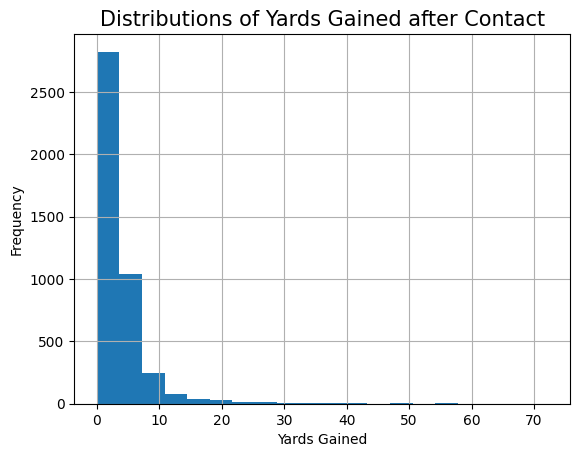

In [43]:
yards_gained_data.hist('yardsGained',bins=20)
plt.xlabel('Yards Gained')
plt.ylabel('Frequency')
plt.title("Distributions of Yards Gained after Contact", fontsize=15)

## Lets do some averaging across all players and see what we discover
Now lets see which players are good at getting yards after contact. Maybe their height and weight play a role

In [17]:
# Calculate total yards after contact gained and the number of plays for each player
yards_after_contact = yards_gained_data.groupby('nflId')['yardsGained'].sum()
plays_participated = yards_gained_data['nflId'].value_counts()

# Calculate the average yards after contact
average_yards_after_contact = yards_after_contact / plays_participated[yards_after_contact.index]

# Create a DataFrame with the calculated values
player_stats_extra = pd.DataFrame({
    'nflId': yards_after_contact.index,
    'YardsAfterContactGained': yards_after_contact.values,
    'PlaysParticipated': plays_participated[yards_after_contact.index].values,
    'AverageYardsAfterContact': average_yards_after_contact
})
player_stats_extra.drop('nflId', axis=1, inplace=True)
player_stats_extra = player_stats_extra.reset_index()


# Merge the new DataFrame with player_stats using the 'nflId' column as the key
player_stats = player_stats.merge(player_stats_extra, on='nflId', how='left')

# Fill missing values with 0
player_stats.fillna(0, inplace=True)
player_stats

,nflId,height,weight,position,displayName,YardsAfterContactGained,PlaysParticipated,AverageYardsAfterContact
0,25511,6-4,225,QB,Tom Brady,0.00,0.0,0.00
1,29550,6-4,328,T,Jason Peters,0.00,0.0,0.00
2,29851,6-2,225,QB,Aaron Rodgers,0.00,0.0,0.00
3,30842,6-6,267,TE,Marcedes Lewis,1.61,1.0,1.61
4,33084,6-4,217,QB,Matt Ryan,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...
1678,55200,6-6,266,DT,Ryder Anderson,0.00,0.0,0.00
1679,55212,6-0,230,ILB,Jake Hummel,0.00,0.0,0.00
1680,55239,6-2,300,DT,Prince Emili,0.00,0.0,0.00
1681,55240,6-1,185,CB,Ja'Marcus Ingram,0.00,0.0,0.00


In [18]:
player_stats = player_stats.sort_values(by='AverageYardsAfterContact', ascending=False)
player_stats.head(5)

,nflId,height,weight,position,displayName,YardsAfterContactGained,PlaysParticipated,AverageYardsAfterContact
373,43495,6-1,189,WR,Mike Thomas,25.99,1.0,25.99000
1603,54663,6-4,221,TE,Grant Calcaterra,21.74,1.0,21.74000
195,42350,6-3,216,WR,Kevin White,40.38,2.0,20.19000
1044,52467,6-3,208,WR,Denzel Mims,52.31,4.0,13.07750
1028,52450,6-2,220,WR,Laviska Shenault,90.07,8.0,11.25875


Do height and weight play a role in yards after catch? My initial thought is that smaller heavier players are harder to tackle

In [19]:
#Convert height to inches
def height_to_inches(height_str):
    if height_str is None:
        return None
    
    feet, inches = height_str.split('-')
    total_inches = int(feet) * 12 + int(inches)
    return total_inches

player_stats['height'] = player_stats['height'].apply(height_to_inches)


In [ ]:
#Calculate BMI
# Convert height from inches to meters (1 inch = 0.0254 meters)
player_stats['height_m'] = yac_df['height'] * 0.0254


# Convert weight from pounds to kilograms (1 pound = 0.453592 kilograms)
player_stats['weight_kg'] = yac_df['weight'] * 0.453592

# Calculate BMI
player_stats['BMI'] = yac_df['weight_kg'] / (yac_df['height_m'] ** 2)



In [20]:
#I would like to see pattern behavior, rather than a few lucky breaks
player_stats[(player_stats.PlaysParticipated > 5)]

,nflId,height,weight,position,displayName,YardsAfterContactGained,PlaysParticipated,AverageYardsAfterContact
1028,52450,74,220,WR,Laviska Shenault,90.07,8.0,11.258750
1413,53703,72,220,RB,Deon Jackson,88.03,10.0,8.803000
829,47856,70,222,RB,David Montgomery,94.44,12.0,7.870000
1577,54616,71,220,RB,Tyler Allgeier,44.91,6.0,7.485000
103,40078,73,240,FB,Kyle Juszczyk,59.40,8.0,7.425000
...,...,...,...,...,...,...,...,...
68,38696,74,198,WR,Marvin Jones,23.87,18.0,1.326111
899,47991,71,174,WR,Scott Miller,9.92,8.0,1.240000
227,42412,70,182,WR,Tyler Lockett,25.18,22.0,1.144545
83,39973,73,212,WR,DeAndre Hopkins,13.68,12.0,1.140000


## Linear regression on height and weight
Lets do a simple linear regression to see if height, weight, and position are predictive variables 

In [21]:
from sklearn.linear_model import LinearRegression

#Only look at players who played in more than 2 plays. Since 
player_stats_filtered = player_stats[player_stats.PlaysParticipated > 5 ]


#Set up our regressor
X = player_stats_filtered[['height', 'weight']]

y = player_stats_filtered['AverageYardsAfterContact']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Print the coefficients and intercept
print("Intercept:", model.intercept_)
print("Height:", model.coef_[0], 'Weight:', model.coef_[1])

Intercept: 11.032760997052154
Height: -0.14774029981289138 Weight: 0.01467956613328883


The analysis reveals some interesting insights:

- **Intercept (Constant)**: The intercept value is 11.03, which suggests that, on average, a player can be expected to gain approximately 11.03 yards after contact.

- **Height Coefficient**: The coefficient for height is -0.1477, indicating that for every inch taller a player is, you can expect approximately a tenth of a yard less in yards gained after contact. This suggests that shorter players may have an advantage in breaking tackles or gaining yards as they are tackled, possibly due to their lower center of gravity and potentially higher strength.

- **Weight Coefficient**: The coefficient for weight is 0.0147, suggesting that for every pound heavier a player is, there is a slight increase in yards gained after contact. While this effect is not as significant as height, it indicates that player weight may have a positive influence on their ability to gain yards after contact.


### Thoughts

While this is good practice to get a feel for building models off of this kind of data, it would be more useful to attempt to predict individual play results, rather than player averages over 9 weeks of a season. The purposes of this project are to predict tackling patterns using tracking data, so we should take a look at player positions and speeds at the time of contact in different situations. However, this notebook should provide with some insights on how to manipulate the tracking dataframes and calculate new variables such as Yards after contact. My next step will be further investigating play-by-play data, specifically positioning and speed of players when a tackle is made

In [22]:
filtered_tracking_data.event.unique()

array([nan, 'pass_arrived', 'pass_outcome_caught', 'first_contact',
       'tackle', 'out_of_bounds', 'pass_forward', 'handoff',
       'pass_shovel', 'touchdown', 'fumble', 'autoevent_passinterrupted',
       'penalty_flag', 'fumble_defense_recovered', 'lateral'],
      dtype=object)

## Find the defender who makes first contact with the ballcarrier
There can be between 1 and 5 defenders listed in the tackles dataframe per play. There is a clear indication of when the first defensive player makes contact with the ballcarrier ('first_contact' in the events column of the tracking data), but no such indication for contact afterwards, until the player is tackled. Lets explore how frequently multiple defenders are involved in the tackle.

In [23]:
duplicates = tackles_pass.groupby(['gameId', 'playId'])['nflId'].nunique().reset_index()
duplicates.rename(columns={'nflId': 'num_defenders'}, inplace=True)
duplicates
multiple_defenders_plays = duplicates[duplicates['num_defenders'] > 1]
print(multiple_defenders_plays)
print(multiple_defenders_plays.num_defenders.unique())

          gameId  playId  num_defenders
6     2022090800     593              2
11    2022090800     818              2
14    2022090800    1102              2
17    2022090800    1358              2
18    2022090800    1712              2
...          ...     ...            ...
4221  2022110610    4162              2
4222  2022110610    4220              2
4227  2022110700     588              2
4237  2022110700    2096              2
4240  2022110700    3323              2

[1361 rows x 3 columns]
[2 3 4 5]


In [24]:
print(f'There are {multiple_defenders_plays.shape[0]} pass plays in which more than one defender is listed in the tackles dataframe out of {tackles_pass.shape[0]} total pass plays, or {round(multiple_defenders_plays.shape[0]/tackles_pass.shape[0]*100,2)}% of all the plays')

There are 1361 pass plays in which more than one defender is listed in the tackles dataframe out of 5819 total pass plays, or 23.39% of all the plays


So in the majority of plays, only one defender is listed in making the tackle. That 23% is not isignificant, however, so let's circle back to it. For now though, lets look at wether or not the ballcarrier can break the **first** tackle. We can do so by adding a 'first defender' column to our tackles dataframe, to signify which defender first touched the ballcarrier. 

## Identifying the first defender to touch ballcarrier
Let us assume that the defensive player who is closest (ie. has the closest euclidean distance) to the ballcarrier at the time of 'first contact' is indeed the first defender to touch the ballcarrier. Let's define a function that can calculate distance to the ballcarrier.

In [25]:
def first_defender(row):
    gameId = row['gameId']
    playId = row['playId']
    defenderId = row['nflId']
    

In [26]:
# This function will calculate the distance to the ballcarrier 
def get_distance(row, tracking, event):
    gameId = row['gameId']
    playId = row['playId']
    defenderId = row['nflId']
    
    selected_tracking = tracking[(tracking.gameId == gameId) & (tracking.playId == playId)]
    
    
    if (event == 'first_contact') | (event == 'pass_outcome_caught'):
        x_ballcarrier = selected_tracking[(selected_tracking.event == event) & (selected_tracking.nflId == selected_tracking.ballCarrierId)]['x'].values[0]
        y_ballcarrier = selected_tracking[(selected_tracking.event == event) & (selected_tracking.nflId == selected_tracking.ballCarrierId)]['y'].values[0]
        x_defender = selected_tracking[(selected_tracking.event == event) & (selected_tracking.nflId == defenderId)]['x'].values[0]
        y_defender = selected_tracking[(selected_tracking.event == event) & (selected_tracking.nflId == defenderId)]['y'].values[0]
        return np.sqrt((x_defender - x_ballcarrier)**2 + (y_defender - y_ballcarrier)**2)
    else:
        return "Event should be either first_contact or pass_outcome_caught"


In [27]:
# Apply the function to each row in the dataframe
tackles_pass.loc[:,'distance_first_contact'] = tackles_pass.apply(get_distance, args=(filtered_tracking_data, 'first_contact'), axis=1)
tackles_pass.loc[:,'distance_ball_caught'] = tackles_pass.apply(get_distance, args=(filtered_tracking_data, 'pass_outcome_caught'), axis=1)
tackles_pass

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle,displayName,distance_first_contact,distance_ball_caught
0,2022090800,486,40166,1,0,0,0,Jordan Poyer,1.114630,1.612452
1,2022090800,646,47939,1,0,0,0,Justin Hollins,0.773886,6.267767
2,2022090800,818,40107,1,0,0,0,Micah Hyde,0.868850,4.760000
3,2022090800,1286,44976,1,0,0,0,Matt Milano,0.711688,8.939536
4,2022090800,2860,46085,1,0,0,0,Tremaine Edmunds,0.522015,3.684155
...,...,...,...,...,...,...,...,...,...,...
5814,2022092502,2485,48259,0,0,0,1,Darius Harris,3.082110,4.172781
5815,2022092502,2795,38843,0,0,0,1,Rodney McLeod,9.727538,11.500213
5816,2022092502,2795,45287,0,0,0,1,Kenny Moore,1.578132,4.111083
5817,2022092502,2795,46304,0,0,0,1,Zaire Franklin,0.376431,1.939407


In [28]:
tackles_pass[(tackles_pass.gameId == 2022091100)&(tackles_pass.playId == 3148)]

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle,displayName,distance_first_contact,distance_ball_caught
3722,2022091100,3148,52542,0,1,0,0,Jaylinn Hawkins,0.894707,20.742324
3774,2022091100,3148,46823,0,1,0,0,Mike Ford,1.146298,12.404032


In [29]:
tackles_pass['first_defender'] = ""
for index, row in tackles_pass.iterrows():
    play_id = row['playId']
    game_id = row['gameId']

    # Filter dataframe to the same play and game
    same_play_game = tackles_pass[(tackles_pass['playId'] == play_id) & (tackles_pass['gameId'] == game_id)]
    
    # Find the player with the shortest distance_first_contact
    shortest_distance_player = same_play_game.loc[same_play_game['distance_first_contact'].idxmin()]['displayName']
    
    # Update 'first_defender_updated' for the row
    tackles_pass.at[index, 'first_defender'] = shortest_distance_player


In [30]:
tackles_pass[tackles_pass.playId == 818].sort_values(by=['gameId','playId'])

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle,displayName,distance_first_contact,distance_ball_caught,first_defender
2,2022090800,818,40107,1,0,0,0,Micah Hyde,0.868850,4.760000,Micah Hyde
4120,2022090800,818,54650,0,1,0,0,Christian Benford,6.636724,11.552177,Micah Hyde
3065,2022103007,818,54469,1,0,0,0,Ahmad Gardner,0.949210,2.166010,Ahmad Gardner
4775,2022103007,818,43301,0,1,0,0,Sheldon Rankins,3.839284,4.979197,Ahmad Gardner


Now lets filter out for only the defender who makes first contacet.

In [31]:
#Fdo stands for 'first defender only'
tackles_pass_fdo = tackles_pass[tackles_pass.displayName == tackles_pass.first_defender]
tackles_pass_fdo

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle,displayName,distance_first_contact,distance_ball_caught,first_defender
0,2022090800,486,40166,1,0,0,0,Jordan Poyer,1.114630,1.612452,Jordan Poyer
1,2022090800,646,47939,1,0,0,0,Justin Hollins,0.773886,6.267767,Justin Hollins
2,2022090800,818,40107,1,0,0,0,Micah Hyde,0.868850,4.760000,Micah Hyde
3,2022090800,1286,44976,1,0,0,0,Matt Milano,0.711688,8.939536,Matt Milano
4,2022090800,2860,46085,1,0,0,0,Tremaine Edmunds,0.522015,3.684155,Tremaine Edmunds
...,...,...,...,...,...,...,...,...,...,...,...
5807,2022091109,928,53462,0,0,0,1,Tyson Campbell,0.662193,1.717586,Tyson Campbell
5809,2022091109,3087,44926,0,0,0,1,Rayshawn Jenkins,0.850059,4.472136,Rayshawn Jenkins
5811,2022091109,3357,53448,0,0,0,1,Jamin Davis,0.864696,2.507150,Jamin Davis
5817,2022092502,2795,46304,0,0,0,1,Zaire Franklin,0.376431,1.939407,Zaire Franklin


Speed of both the defender as well as the ballcarrier prior to the tackle is likely a factor in the success of the tackle. Let's write a function to calculate the average speed of the ballcarrier as well as the defender in the frames between 'pass_outcome_caught' and 'first_contact' inclusive.

In [32]:
def get_avg_speed(row, filtered_tracking_data, defender):
    gameId = row['gameId']
    playId = row['playId']
    defenderId = row['nflId']
    
    selected_tracking = filtered_tracking_data[(filtered_tracking_data.gameId == gameId) & (filtered_tracking_data.playId == playId)]

    # Get the frame when the pass was caught
    first_frame = selected_tracking[selected_tracking.event == 'pass_outcome_caught']['frameId'].values[0]
    last_frame = selected_tracking[selected_tracking.event == 'first_contact']['frameId'].values[0]
    numframes = last_frame - first_frame + 1

    speed_defender = 0
    speed_ballcarrier = 0
    
    for frame in range(first_frame, last_frame + 1):  # Use range to iterate over frames
        speed_defender += selected_tracking[(selected_tracking.frameId == frame) & (selected_tracking.nflId == defenderId)]['s'].values[0] / numframes
        speed_ballcarrier += selected_tracking[(selected_tracking.frameId == frame) & (selected_tracking.nflId == selected_tracking.ballCarrierId)]['s'].values[0] / numframes

    if defender:
        return speed_defender
    else:
        return speed_ballcarrier


In [33]:

# Apply the function to each row in the dataframe
tackles_pass_fdo.loc[:, 'avg_speed_defender'] = tackles_pass_fdo.apply(get_avg_speed, args=(filtered_tracking_data, True), axis=1)
tackles_pass_fdo.loc[:, 'avg_speed_ballcarrier'] = tackles_pass_fdo.apply(get_avg_speed, args=(filtered_tracking_data, False), axis=1)


Now let's circle back to our **yards_gained_data** dataframe and add in the yards a player gained. First lets make sure the df's are the same size and contain the same plays.

In [34]:

yards_gained_data = pd.merge(yards_gained_data, players[['nflId', 'displayName']], on=['nflId'], how='left')

# Rename columns in yards_gained_data
yards_gained_data.rename(columns={'nflId': 'ballCarrierId', 'displayName': 'ballCarrierName'}, inplace=True)

# Drop 'first_defender' column from tackles_pass_fdo
tackles_pass_fdo.drop('first_defender', axis=1, inplace=True)

# Rename columns in tackles_pass_fdo
tackles_pass_fdo.rename(columns={'nflId': 'tacklerId', 'displayName': 'tacklerName'}, inplace=True)


In [35]:
yards_gained_data['ballCarrierId'] = yards_gained_data['ballCarrierId'].astype(int)
yards_gained_data

,gameId,playId,ballCarrierId,yardsGained,first_contact_x,tackled_x,ballCarrierName
0,2022090800,122,47857,4.70,63.78,59.08,Devin Singletary
1,2022090800,167,42489,3.20,47.77,44.57,Stefon Diggs
2,2022090800,212,52494,2.59,36.93,34.34,Zack Moss
3,2022090800,414,43399,3.33,60.16,63.49,Tyler Higbee
4,2022090800,438,53678,2.51,64.64,67.15,Ben Skowronek
...,...,...,...,...,...,...,...
4286,2022110700,2182,45268,4.36,84.22,88.58,Patrick Ricard
4287,2022110700,2558,42350,0.25,27.41,27.16,Kevin White
4288,2022110700,3323,54476,5.56,28.71,34.27,Chris Olave
4289,2022110700,3347,46160,1.77,39.52,41.29,Tre'Quan Smith


In [36]:
print(f'Yards gained dataframe has {yards_gained_data.shape[0]} rows while tackles dataframe has {tackles_pass_fdo.shape[0]} rows.')


# Merge the two DataFrames on the common columns (gameId and playId)
merged_df = pd.merge(yards_gained_data, tackles, on=['gameId', 'playId'], how='left', indicator=True)

# Filter rows where the play is in yards_gained_data but not in tackles
yards_gained_data_missing_plays = merged_df[merged_df['_merge'] == 'left_only']

# Display the missing plays
print(yards_gained_data_missing_plays)


Yards gained dataframe has 4291 rows while tackles dataframe has 4243 rows.
          gameId  playId  ballCarrierId  yardsGained  first_contact_x  \
154   2022091103    1249          53453         2.28            10.52   
219   2022091104    3059          53541         1.35           109.08   
256   2022091105    1405          44831         2.74            11.89   
272   2022091105    2425          44831         3.13           107.64   
288   2022091105    3750          52442         4.63           105.42   
...          ...     ...            ...          ...              ...   
5636  2022110606    2455          52733         4.19            13.16   
5661  2022110607    1940          44852         1.31           109.94   
5670  2022110607    2827          53687         1.68            10.14   
5724  2022110608    2351          48646         3.84            90.27   
5752  2022110609    1050          44881         7.45           104.51   

      tackled_x    ballCarrierName  nflId  tack

Let's do some further investigation as to why these plays aren't in out tackles dataframe. Let's print out some play descriptions


In [37]:
plays_missing_plays = plays[
    plays.set_index(['gameId', 'playId']).index.isin(yards_gained_data_missing_plays.set_index(['gameId', 'playId']).index)
]
#Print out the play descriptions
for i in range(plays_missing_plays.shape[0]):
    print(plays_missing_plays.iloc[i,4])


(4:14) (Shotgun) J.Goff pass short left to A.St. Brown for 4 yards, TOUCHDOWN.
(1:09) (Shotgun) J.Allen pass deep left to K.Shakir for 24 yards, TOUCHDOWN. PIT-J.Pierre was injured during the play.
(1:38) (Shotgun) J.Goff pass short right to D.Swift for 22 yards, TOUCHDOWN [J.Davis].
(10:33) A.Dalton pass short right to T.Hill for 3 yards, TOUCHDOWN.
(:32) (Shotgun) K.Murray pass short middle to G.Dortch for 5 yards, TOUCHDOWN.
(2:14) (Shotgun) P.Mahomes pass short middle to M.Hardman for 8 yards, TOUCHDOWN. 12 YAC
(7:21) D.Mills pass deep left to O.Howard for 22 yards, TOUCHDOWN.
(10:00) (Shotgun) K.Murray pass short left to G.Dortch to ARZ 24 for no gain. PENALTY on ARZ-G.Dortch, Illegal Forward Pass, 5 yards, enforced at ARZ 24.
(7:52) T.Brady pass short right to C.Brate ran ob at GB 28 for 19 yards.
(2:11) (Shotgun) M.Ryan pass short left to P.Campbell for 4 yards, TOUCHDOWN.
(6:15) (Shotgun) P.Mahomes pass short middle to J.Smith-Schuster for 45 yards, TOUCHDOWN. 31 YAC
(2:57) (Sh

So it would appear that every play that is missing is either a penalty, touchdown, out of bounds, or some other scenario that did not result in a tackle. Let's just remove these as they dont pertain to our problem.

In [38]:
pass_play_info = pd.merge(yards_gained_data, tackles_pass_fdo, on=['gameId', 'playId'], how='inner')
pass_play_info

,gameId,playId,ballCarrierId,yardsGained,first_contact_x,tackled_x,ballCarrierName,tacklerId,tackle,assist,forcedFumble,pff_missedTackle,tacklerName,distance_first_contact,distance_ball_caught,avg_speed_defender,avg_speed_ballcarrier
0,2022090800,122,47857,4.70,63.78,59.08,Devin Singletary,38577,1,0,0,0,Bobby Wagner,1.390575,7.059922,6.558667,5.709333
1,2022090800,167,42489,3.20,47.77,44.57,Stefon Diggs,43298,1,0,0,0,Leonard Floyd,1.313697,2.462214,6.101111,5.812222
2,2022090800,212,52494,2.59,36.93,34.34,Zack Moss,38577,1,0,0,0,Bobby Wagner,0.492443,0.861452,8.543333,7.043333
3,2022090800,414,43399,3.33,60.16,63.49,Tyler Higbee,52647,1,0,0,0,Dane Jackson,1.180169,15.461960,4.570400,6.095600
4,2022090800,438,53678,2.51,64.64,67.15,Ben Skowronek,54650,1,0,0,0,Christian Benford,0.746726,5.826706,4.897000,4.090000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4238,2022110700,2182,45268,4.36,84.22,88.58,Patrick Ricard,40017,1,0,0,0,Tyrann Mathieu,1.220533,2.688959,5.348333,4.737500
4239,2022110700,2558,42350,0.25,27.41,27.16,Kevin White,52436,1,0,0,0,Patrick Queen,1.600000,7.661756,2.880000,4.876364
4240,2022110700,3323,54476,5.56,28.71,34.27,Chris Olave,46077,0,1,0,0,Roquan Smith,1.384088,6.840263,6.931111,4.843333
4241,2022110700,3347,46160,1.77,39.52,41.29,Tre'Quan Smith,54479,1,0,0,0,Kyle Hamilton,0.841724,1.299577,7.413333,6.426667


Great! We now have a dataframe that contains all the info I want to explore with a first model. Let's write this to csv (along with the filtered tracking data) and start another notebook to start exploring models.


In [39]:
pass_play_info.to_csv('yac_data.csv', index=False)
filtered_tracking_data.to_csv('tracking_custom.csv', index=False)